In [1]:
from datetime import datetime
import pandas as pd

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import numpy as np

In [2]:
df = pd.read_csv("jenkins.csv")
print(df.shape)


(66622, 9)


In [3]:
df

,Project,Key,Summary,Status,Type,Assignee,Reporter,CreationDate,ResolutionDate
0,Jenkins,JENKINS-67416,"Jenkisn global shared libraries execute ""sh"" c...",Open,Bug,NaN,Vision Xu,2021-12-21T13:13:27.000+0000,NaN
1,Jenkins,JENKINS-67415,How to modify the number of Jenkins multi bran...,Open,Improvement,Igal Gluh,Li YONGXIN,2021-12-21T10:31:36.000+0000,NaN
2,Jenkins,JENKINS-67414,No description will be displayed when id is used,Open,Bug,NaN,Pa Mau,2021-12-21T07:24:34.000+0000,NaN
3,Jenkins,JENKINS-67413,Remove com.synopsys.arc.jenkins.plugins.rolest...,Open,Improvement,Conrad T. Pino,Conrad T. Pino,2021-12-21T04:29:03.000+0000,NaN
4,Jenkins,JENKINS-67412,Parameter Field length greatly shortened,Open,Improvement,NaN,Todd Vogl,2021-12-20T17:14:06.000+0000,NaN
...,...,...,...,...,...,...,...,...,...
66617,Jenkins,JENKINS-5,IE renders somewhat differently than Firefox,Closed,Bug,NaN,Kohsuke Kawaguchi,2005-02-08T08:50:17.000+0000,2005-12-16T23:52:09.000+0000
66618,Jenkins,JENKINS-4,Kill a build,Closed,Improvement,NaN,Kohsuke Kawaguchi,2005-02-07T16:18:35.000+0000,2005-05-12T07:10:54.000+0000
66619,Jenkins,JENKINS-3,Previous/Next build link,Closed,Improvement,NaN,Kohsuke Kawaguchi,2005-02-07T16:18:07.000+0000,2006-03-26T22:07:11.000+0000
66620,Jenkins,JENKINS-2,CVS changelog dupliation,Closed,Bug,NaN,Kohsuke Kawaguchi,2005-02-07T16:17:23.000+0000,2005-08-12T23:09:45.000+0000


In [4]:
df.columns

Index(['Project', 'Key', 'Summary', 'Status', 'Type', 'Assignee', 'Reporter',
       'CreationDate', 'ResolutionDate'],
      dtype='object')

# First analytics

- #issue by Status
- #issues by Type

Wall time: 1.29 s


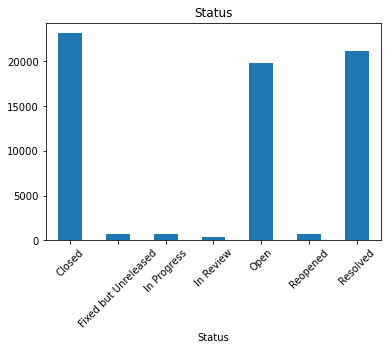

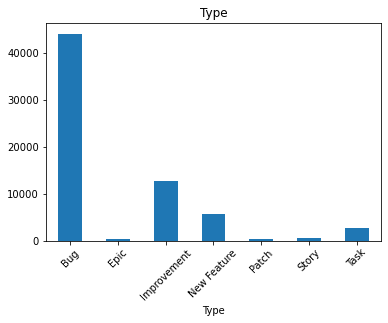

In [5]:
%%time
for col in ["Status", "Type"]:

    df_agg = df.groupby([col], as_index=False).nunique()
    df_agg.plot(x= col, y= "Key", kind="bar", legend=False, title = col, rot=45)
    

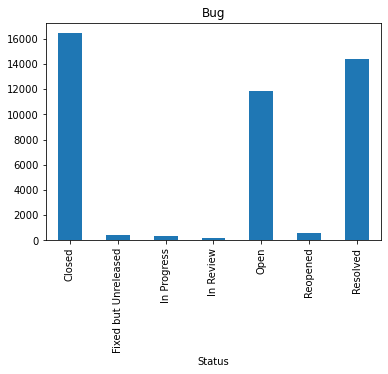

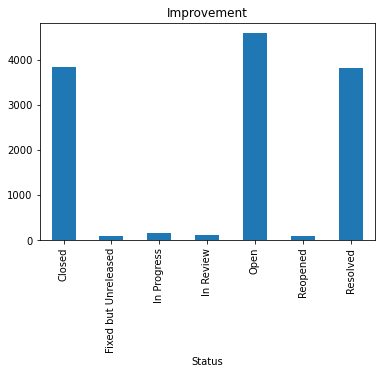

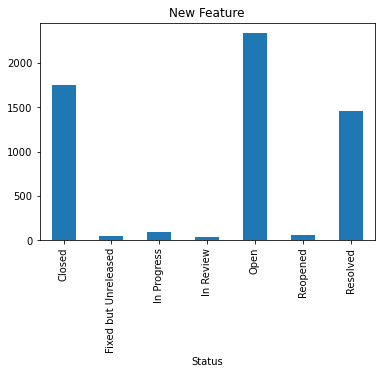

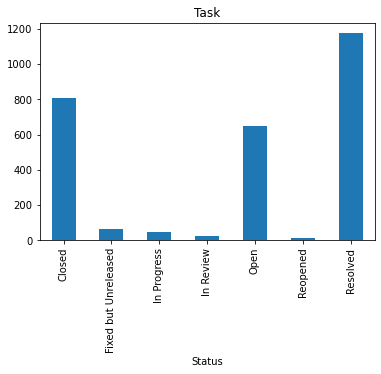

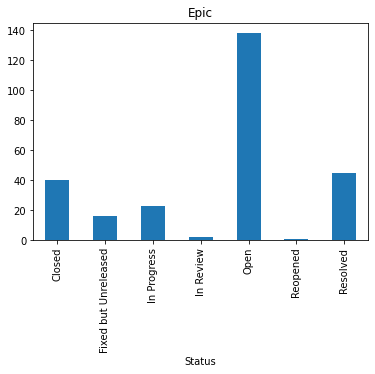

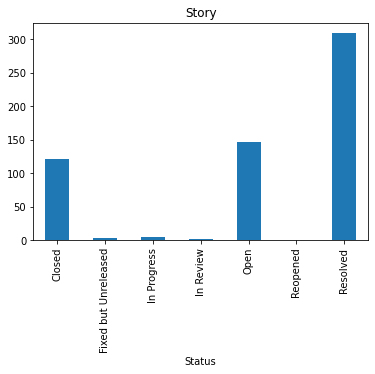

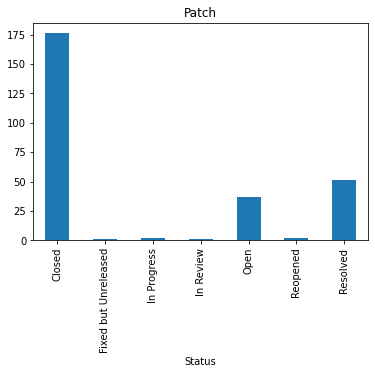

In [6]:
for t in df.Type.unique():
    df_agg = df[df.Type==t].groupby(["Status"], as_index=False).nunique()
    df_agg.plot(x= "Status", y= "Key", kind="bar", legend=False, title = t)

# times series

In [7]:

def convert_time(df, col):
    date=pd.to_datetime(df[col], infer_datetime_format= True) #format="%Y/%m/%dT%H:%M:%S")
    year =date.dt.year
    month = date.dt.month
    day = date.dt.day

    isodate = date.dt.isocalendar()
    isoyear = isodate.year
    isoweek = isodate.week
    isoday = isodate.day

    
    df[col + "_Day"] = day
    df[col + "_Month"]= month
    df[col + "_Year"] = year
    df[col + "_isoDay"] = isoday
    df[col + "_isoweek"]= isoweek
    df[col + "_isoYear"] = isoyear
    
    
    return df.drop(columns=[col], inplace=False)

convert_time(df.copy(), "CreationDate")

,Project,Key,Summary,Status,Type,Assignee,Reporter,ResolutionDate,CreationDate_Day,CreationDate_Month,CreationDate_Year,CreationDate_isoDay,CreationDate_isoweek,CreationDate_isoYear
0,Jenkins,JENKINS-67416,"Jenkisn global shared libraries execute ""sh"" c...",Open,Bug,NaN,Vision Xu,NaN,21,12,2021,2,51,2021
1,Jenkins,JENKINS-67415,How to modify the number of Jenkins multi bran...,Open,Improvement,Igal Gluh,Li YONGXIN,NaN,21,12,2021,2,51,2021
2,Jenkins,JENKINS-67414,No description will be displayed when id is used,Open,Bug,NaN,Pa Mau,NaN,21,12,2021,2,51,2021
3,Jenkins,JENKINS-67413,Remove com.synopsys.arc.jenkins.plugins.rolest...,Open,Improvement,Conrad T. Pino,Conrad T. Pino,NaN,21,12,2021,2,51,2021
4,Jenkins,JENKINS-67412,Parameter Field length greatly shortened,Open,Improvement,NaN,Todd Vogl,NaN,20,12,2021,1,51,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66617,Jenkins,JENKINS-5,IE renders somewhat differently than Firefox,Closed,Bug,NaN,Kohsuke Kawaguchi,2005-12-16T23:52:09.000+0000,8,2,2005,2,6,2005
66618,Jenkins,JENKINS-4,Kill a build,Closed,Improvement,NaN,Kohsuke Kawaguchi,2005-05-12T07:10:54.000+0000,7,2,2005,1,6,2005
66619,Jenkins,JENKINS-3,Previous/Next build link,Closed,Improvement,NaN,Kohsuke Kawaguchi,2006-03-26T22:07:11.000+0000,7,2,2005,1,6,2005
66620,Jenkins,JENKINS-2,CVS changelog dupliation,Closed,Bug,NaN,Kohsuke Kawaguchi,2005-08-12T23:09:45.000+0000,7,2,2005,1,6,2005


In [8]:
df2 = convert_time(convert_time(df.copy(), "CreationDate"), "ResolutionDate")
df2

,Project,Key,Summary,Status,Type,Assignee,Reporter,CreationDate_Day,CreationDate_Month,CreationDate_Year,CreationDate_isoDay,CreationDate_isoweek,CreationDate_isoYear,ResolutionDate_Day,ResolutionDate_Month,ResolutionDate_Year,ResolutionDate_isoDay,ResolutionDate_isoweek,ResolutionDate_isoYear
0,Jenkins,JENKINS-67416,"Jenkisn global shared libraries execute ""sh"" c...",Open,Bug,NaN,Vision Xu,21,12,2021,2,51,2021,NaN,NaN,NaN,<NA>,<NA>,<NA>
1,Jenkins,JENKINS-67415,How to modify the number of Jenkins multi bran...,Open,Improvement,Igal Gluh,Li YONGXIN,21,12,2021,2,51,2021,NaN,NaN,NaN,<NA>,<NA>,<NA>
2,Jenkins,JENKINS-67414,No description will be displayed when id is used,Open,Bug,NaN,Pa Mau,21,12,2021,2,51,2021,NaN,NaN,NaN,<NA>,<NA>,<NA>
3,Jenkins,JENKINS-67413,Remove com.synopsys.arc.jenkins.plugins.rolest...,Open,Improvement,Conrad T. Pino,Conrad T. Pino,21,12,2021,2,51,2021,NaN,NaN,NaN,<NA>,<NA>,<NA>
4,Jenkins,JENKINS-67412,Parameter Field length greatly shortened,Open,Improvement,NaN,Todd Vogl,20,12,2021,1,51,2021,NaN,NaN,NaN,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66617,Jenkins,JENKINS-5,IE renders somewhat differently than Firefox,Closed,Bug,NaN,Kohsuke Kawaguchi,8,2,2005,2,6,2005,16.0,12.0,2005.0,5,50,2005
66618,Jenkins,JENKINS-4,Kill a build,Closed,Improvement,NaN,Kohsuke Kawaguchi,7,2,2005,1,6,2005,12.0,5.0,2005.0,4,19,2005
66619,Jenkins,JENKINS-3,Previous/Next build link,Closed,Improvement,NaN,Kohsuke Kawaguchi,7,2,2005,1,6,2005,26.0,3.0,2006.0,7,12,2006
66620,Jenkins,JENKINS-2,CVS changelog dupliation,Closed,Bug,NaN,Kohsuke Kawaguchi,7,2,2005,1,6,2005,12.0,8.0,2005.0,5,32,2005


### issues creation per month

In [9]:
df3 = df2.groupby(['CreationDate_Year', 'CreationDate_Month'], as_index=False).nunique()
df3.head()

,CreationDate_Year,CreationDate_Month,Project,Key,Summary,Status,Type,Assignee,Reporter,CreationDate_Day,CreationDate_isoDay,CreationDate_isoweek,CreationDate_isoYear,ResolutionDate_Day,ResolutionDate_Month,ResolutionDate_Year,ResolutionDate_isoDay,ResolutionDate_isoweek,ResolutionDate_isoYear
0,2005,2,1,5,5,1,2,0,1,3,3,2,1,4,5,3,4,5,3
1,2005,4,1,2,2,1,1,0,1,1,1,1,1,2,1,1,2,2,1
2,2005,5,1,2,2,1,2,0,1,1,1,1,1,2,2,2,2,2,2
3,2005,8,1,14,14,2,3,0,4,6,5,4,1,8,6,5,6,9,5
4,2005,9,1,2,2,1,2,1,2,2,2,1,1,2,2,2,2,2,2


<AxesSubplot:title={'center':'# created issue'}, xlabel='Year-Month'>

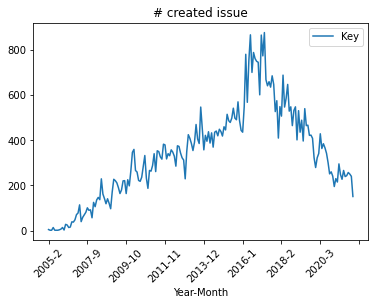

In [10]:
df3b = df3.copy()
df3b["Year-Month"]= df3b["CreationDate_Year"].astype(str) + "-" + df3b["CreationDate_Month"].astype(str)
df3b
df3b.plot(x= "Year-Month", y= "Key", kind="line", legend=True, rot=45, title="# created issue" )

### issues resolution per month

In [11]:
df4 = df2.groupby(['ResolutionDate_Year', 'ResolutionDate_Month'], as_index=False).nunique()
for col in ["ResolutionDate_Year","ResolutionDate_Month"]:
    df4[col] = df4[col].astype(int)

df4

,ResolutionDate_Year,ResolutionDate_Month,Project,Key,Summary,Status,Type,Assignee,Reporter,CreationDate_Day,CreationDate_Month,CreationDate_Year,CreationDate_isoDay,CreationDate_isoweek,CreationDate_isoYear,ResolutionDate_Day,ResolutionDate_isoDay,ResolutionDate_isoweek,ResolutionDate_isoYear
0,2005,5,1,3,3,1,1,0,2,2,2,1,2,2,1,2,2,2,1
1,2005,8,1,10,10,1,3,0,4,6,3,1,4,5,1,5,5,4,1
2,2005,9,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1
3,2005,10,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1
4,2005,12,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2021,8,1,150,150,3,6,57,114,30,12,9,7,39,9,30,7,6,1
191,2021,9,1,139,139,3,6,48,86,29,9,8,7,28,8,27,7,5,1
192,2021,10,1,164,164,3,6,58,130,31,12,8,7,43,8,28,7,5,1
193,2021,11,1,226,226,3,6,64,175,31,12,7,7,47,7,30,7,5,1


<AxesSubplot:title={'center':'# Resolved issue'}, xlabel='Year-Month'>

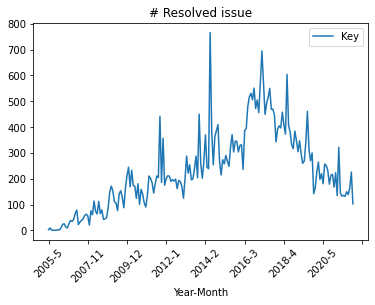

In [12]:
df4b = df4.copy()
df4b["Year-Month"]= df4b["ResolutionDate_Year"].astype(int).astype(str) + "-" + df4b["ResolutionDate_Month"].astype(str)
df4b
df4b.plot(x= "Year-Month", y= "Key", kind="line", legend=True, rot=45, title="# Resolved issue" )

In [13]:
df3b

,CreationDate_Year,CreationDate_Month,Project,Key,Summary,Status,Type,Assignee,Reporter,CreationDate_Day,CreationDate_isoDay,CreationDate_isoweek,CreationDate_isoYear,ResolutionDate_Day,ResolutionDate_Month,ResolutionDate_Year,ResolutionDate_isoDay,ResolutionDate_isoweek,ResolutionDate_isoYear,Year-Month
0,2005,2,1,5,5,1,2,0,1,3,3,2,1,4,5,3,4,5,3,2005-2
1,2005,4,1,2,2,1,1,0,1,1,1,1,1,2,1,1,2,2,1,2005-4
2,2005,5,1,2,2,1,2,0,1,1,1,1,1,2,2,2,2,2,2,2005-5
3,2005,8,1,14,14,2,3,0,4,6,5,4,1,8,6,5,6,9,5,2005-8
4,2005,9,1,2,2,1,2,1,2,2,2,1,1,2,2,2,2,2,2,2005-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,2021,8,1,243,243,6,6,80,164,29,7,5,1,30,5,1,7,17,1,2021-8
193,2021,9,1,257,257,6,6,86,177,30,7,5,1,27,3,1,7,13,1,2021-9
194,2021,10,1,250,246,7,6,94,188,31,7,5,1,26,3,1,7,12,1,2021-10
195,2021,11,1,240,239,6,6,75,187,29,7,5,1,28,2,1,7,8,1,2021-11


In [14]:
df4b

,ResolutionDate_Year,ResolutionDate_Month,Project,Key,Summary,Status,Type,Assignee,Reporter,CreationDate_Day,CreationDate_Month,CreationDate_Year,CreationDate_isoDay,CreationDate_isoweek,CreationDate_isoYear,ResolutionDate_Day,ResolutionDate_isoDay,ResolutionDate_isoweek,ResolutionDate_isoYear,Year-Month
0,2005,5,1,3,3,1,1,0,2,2,2,1,2,2,1,2,2,2,1,2005-5
1,2005,8,1,10,10,1,3,0,4,6,3,1,4,5,1,5,5,4,1,2005-8
2,2005,9,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,2005-9
3,2005,10,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,2005-10
4,2005,12,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,2005-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2021,8,1,150,150,3,6,57,114,30,12,9,7,39,9,30,7,6,1,2021-8
191,2021,9,1,139,139,3,6,48,86,29,9,8,7,28,8,27,7,5,1,2021-9
192,2021,10,1,164,164,3,6,58,130,31,12,8,7,43,8,28,7,5,1,2021-10
193,2021,11,1,226,226,3,6,64,175,31,12,7,7,47,7,30,7,5,1,2021-11


In [15]:
print(len(df3b["Year-Month"].unique()), len(df4b["Year-Month"].unique()))

197 195


In [16]:
df3b[df3b.CreationDate_Year>2019]

,CreationDate_Year,CreationDate_Month,Project,Key,Summary,Status,Type,Assignee,Reporter,CreationDate_Day,CreationDate_isoDay,CreationDate_isoweek,CreationDate_isoYear,ResolutionDate_Day,ResolutionDate_Month,ResolutionDate_Year,ResolutionDate_isoDay,ResolutionDate_isoweek,ResolutionDate_isoYear,Year-Month
173,2020,1,1,322,322,7,6,104,240,31,7,5,1,30,12,2,7,34,2,2020-1
174,2020,2,1,341,340,7,5,120,269,29,7,5,1,30,12,2,7,38,2,2020-2
175,2020,3,1,428,384,7,6,132,281,31,7,6,1,31,12,2,7,40,2,2020-3
176,2020,4,1,363,363,7,6,136,275,29,7,5,1,31,12,2,7,39,2,2020-4
177,2020,5,1,384,382,7,7,142,269,31,7,5,1,31,12,2,7,40,2,2020-5
178,2020,6,1,366,366,7,6,119,231,30,7,5,1,30,12,2,7,38,2,2020-6
179,2020,7,1,342,342,7,6,123,253,31,7,5,1,31,12,2,7,40,2,2020-7
180,2020,8,1,301,300,6,7,94,233,30,7,6,1,30,11,2,7,30,2,2020-8
181,2020,9,1,251,251,6,5,90,211,29,7,5,1,30,12,2,7,33,2,2020-9
182,2020,10,1,260,260,7,5,80,226,31,7,5,1,30,10,2,7,28,2,2020-10


In [17]:
df3b[df3b.CreationDate_Year>2019]["Year-Month"]

173     2020-1
174     2020-2
175     2020-3
176     2020-4
177     2020-5
178     2020-6
179     2020-7
180     2020-8
181     2020-9
182    2020-10
183    2020-11
184    2020-12
185     2021-1
186     2021-2
187     2021-3
188     2021-4
189     2021-5
190     2021-6
191     2021-7
192     2021-8
193     2021-9
194    2021-10
195    2021-11
196    2021-12
Name: Year-Month, dtype: object

In [18]:
df4b[df4b.ResolutionDate_Year>2019]["Year-Month"]

171     2020-1
172     2020-2
173     2020-3
174     2020-4
175     2020-5
176     2020-6
177     2020-7
178     2020-8
179     2020-9
180    2020-10
181    2020-11
182    2020-12
183     2021-1
184     2021-2
185     2021-3
186     2021-4
187     2021-5
188     2021-6
189     2021-7
190     2021-8
191     2021-9
192    2021-10
193    2021-11
194    2021-12
Name: Year-Month, dtype: object

In [19]:
frames = [df3b[df3b.CreationDate_Year>2019][["Year-Month", "Key"]].reset_index(), 
          df4b[df4b.ResolutionDate_Year>2019][["Year-Month", "Key"]].reset_index()]

pd.concat(frames, axis = 1)

,index,Year-Month,Key,index,Year-Month,Key
0,173,2020-1,322,171,2020-1,228
1,174,2020-2,341,172,2020-2,265
2,175,2020-3,428,173,2020-3,198
3,176,2020-4,363,174,2020-4,220
4,177,2020-5,384,175,2020-5,181
5,178,2020-6,366,176,2020-6,257
6,179,2020-7,342,177,2020-7,252
7,180,2020-8,301,178,2020-8,232
8,181,2020-9,251,179,2020-9,179
9,182,2020-10,260,180,2020-10,214
